In [1]:
%load_ext autoreload
%autoreload 2
from lens_simulation.Lens import Lens, LensType, GratingSettings
from lens_simulation.Medium import Medium, LithiumNiabate

from lens_simulation.structures import SimulationOptions, SimulationParameters
from lens_simulation import utils
import matplotlib.pyplot as plt

import numpy as np


In [2]:
# create lens
parameters = SimulationParameters(
    A=10000,
    pixel_size=1e-6,
    sim_height=1000e-6,
    sim_width=1000e-6,
    sim_wavelength=488e-9,
    lens_type=LensType.Spherical,
)



lens:  (501, 501)


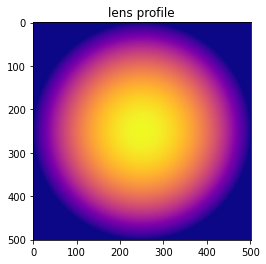

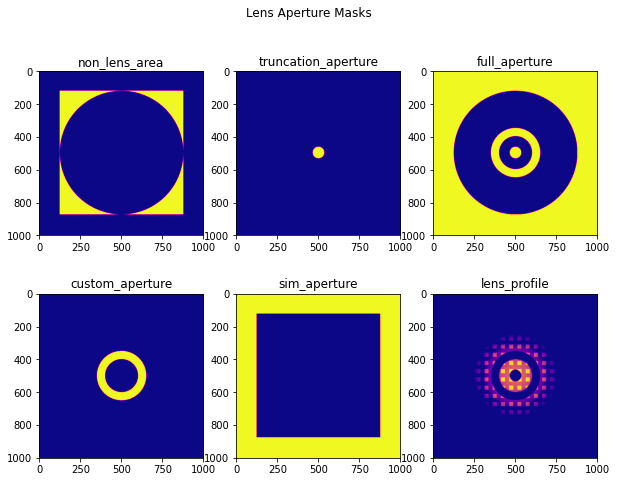

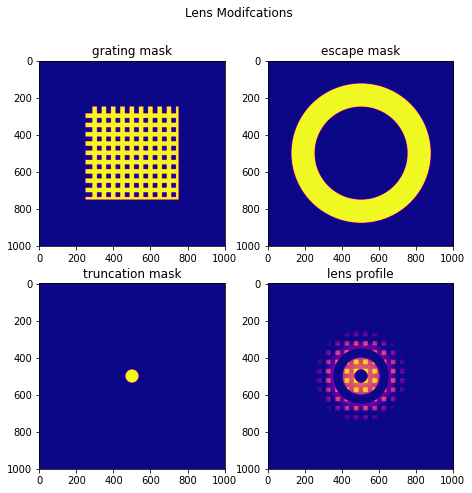

In [5]:

from lens_simulation.Lens import test_escape_path_fits_inside_simulation
from lens_simulation.Simulation import pad_simulation

ep = 0.5
lens_type = LensType.Cylindrical
lens_type = LensType.Spherical

lens = Lens(500e-6, 50e-6, 2.0, LithiumNiabate())
lens.generate_profile(parameters.pixel_size, lens_type, length=200e-6)

print("lens: ", lens.profile.shape)
plt.imshow(lens.profile, cmap="plasma")
plt.title("lens profile")
plt.show()

# aperture
lens.create_custom_aperture(100e-6, 150e-6, type="radial", inverted=False)

# truncation
lens.create_truncation_mask(truncation_height=49e-6, aperture=True)

grating_settings = GratingSettings(
    width = 25e-6,
    distance = 50e-6,
    depth = 20e-6,
    centred = True
)

lens.create_grating_mask(grating_settings, True, True)

lens.apply_masks(grating=True, truncation=True)

# escape path
lens.create_escape_path(parameters, ep)

# pad simulation
lens = pad_simulation(lens, parameters)

# apply all mask
lens.apply_aperture_masks()

fig = utils.plot_apeture_masks(lens)
plt.show()

fig = utils.plot_lens_modifications(lens)
plt.show()



# TODO: add escape path to config


In [4]:
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.1)
test_escape_path_fits_inside_simulation(lens, parameters, ep=0.5)
test_escape_path_fits_inside_simulation(lens, parameters, ep=1.5)

ValueError: The given escape path is outside the simulation size: ep: 1101px, sim: 1001px

before validation
{'diameter': 0.0003,
 'escape_path': 0.5,
 'exponent': 2.0,
 'height': 5e-06,
 'medium': 'medium_1',
 'name': 'lens_2'}
after validation
{'aperture': None,
 'custom': None,
 'diameter': 0.0003,
 'escape_path': 0.5,
 'exponent': 2.0,
 'grating': None,
 'height': 5e-06,
 'length': None,
 'medium': 'medium_1',
 'name': 'lens_2',
 'truncation': None}


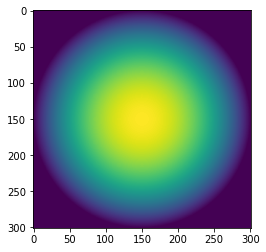

In [6]:
from lens_simulation import utils, validation
from lens_simulation.Lens import Lens, generate_lens, LensType
from lens_simulation.Medium import LithiumNiabate
from pprint import pprint

lens_config = utils.load_yaml_config("lens.yaml")

print("before validation")
pprint(lens_config)

lens_config = validation._validate_default_lens_config(lens_config)

print("after validation")
pprint(lens_config)

lens = generate_lens(lens_config, LithiumNiabate())

lens.generate_profile(1e-6, LensType.Spherical)

# external pixel_size, lens_type

import matplotlib.pyplot as plt
plt.imshow(lens.profile)
plt.show()

